# Problem Statment
- Customer Segmentation Analysis:

Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.shape

(200, 5)

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visuliation & EDA

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

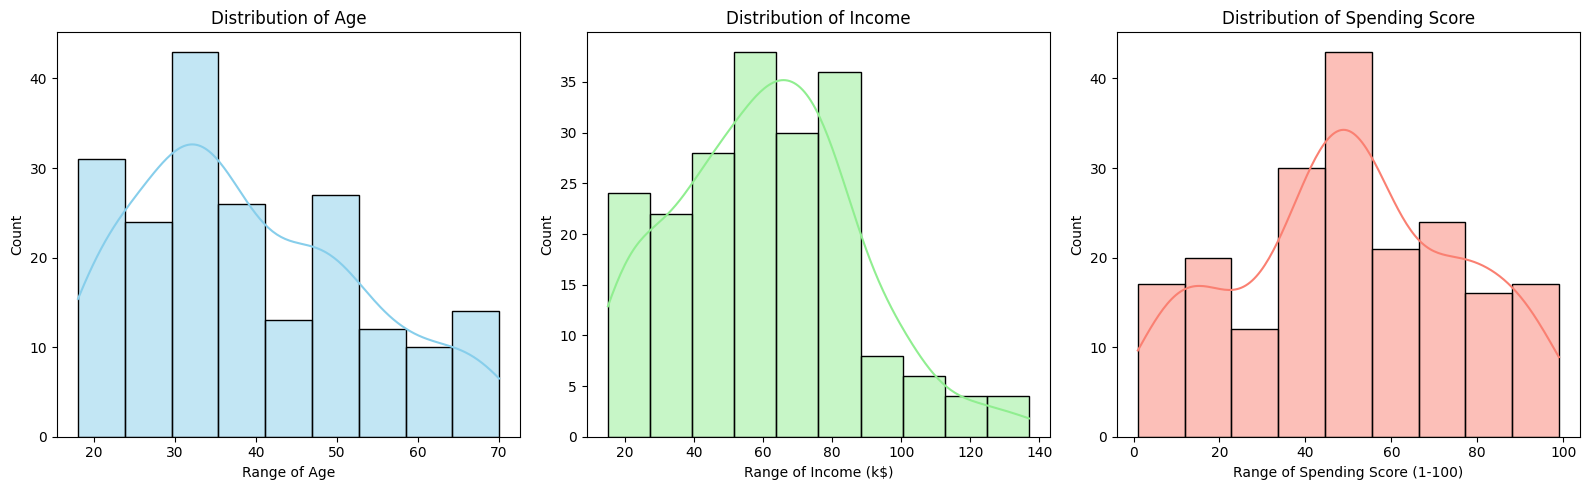

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (make sure the CSV file path is correct)
data = pd.read_csv("Mall_Customers.csv")

# Plot distributions
plt.figure(figsize=(16, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

# Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='lightgreen')
plt.title("Distribution of Income")
plt.xlabel("Range of Income (k$)")
plt.ylabel("Count")

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='salmon')
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score (1-100)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


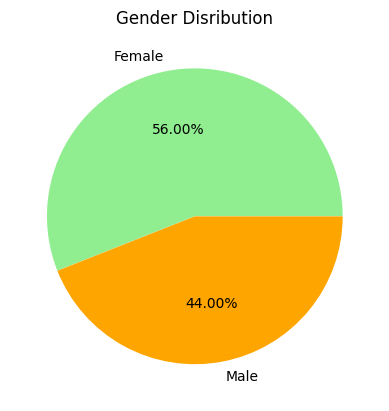

In [20]:
df = data.groupby('Gender').size()

df.plot(kind='pie', subplots = True, 
       colors = ['lightgreen', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%' )
plt.title("Gender Disribution")
plt.ylabel("")
plt.show()

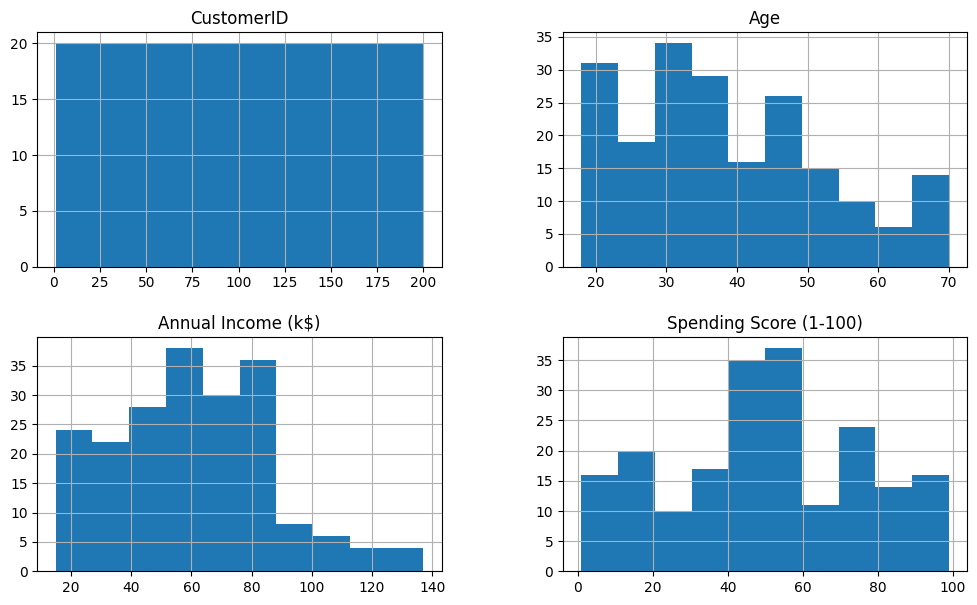

In [21]:
data.hist(figsize = (12, 7))
plt.show()

# K-Means Clustering

In [73]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [78]:
x = data.iloc[:, [3,4]].values

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [81]:
# Load dataset (ensure 'Mall_Customers.csv' is in your working directory)
data = pd.read_csv("Mall_Customers.csv")


In [82]:
print(data.head())       # View first 5 rows
print(data.info())       # Check data types and null values
print(data.describe())   # Summary statistics


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [83]:
# Select columns: Annual Income (k$) and Spending Score (1–100)
X = data.iloc[:, [3, 4]].values


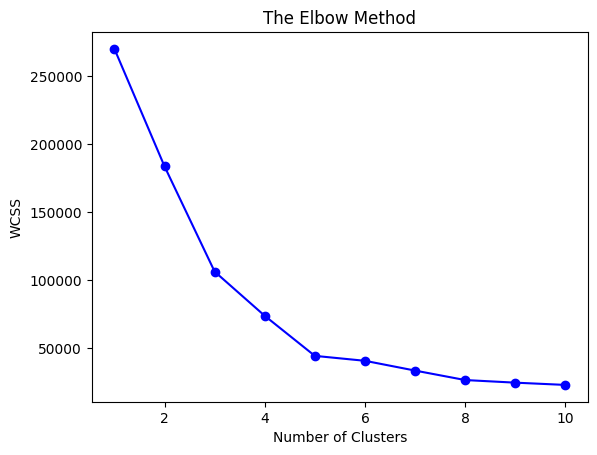

In [90]:
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [85]:
# Apply K-Means with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


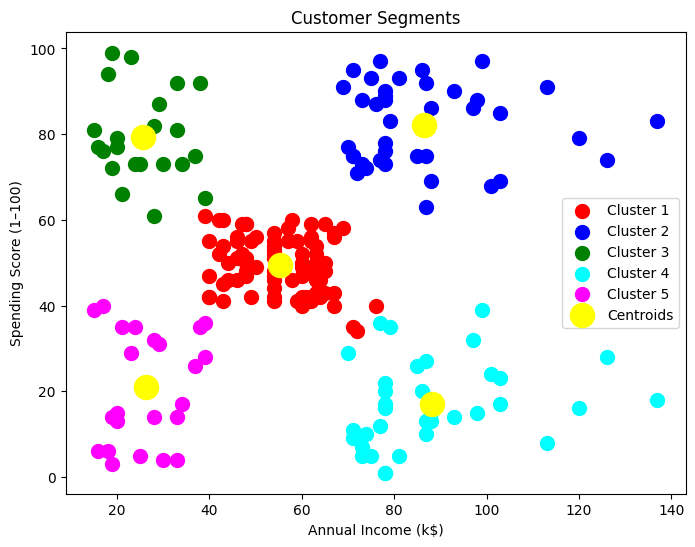

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()


In [87]:
data['Cluster'] = y_kmeans
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


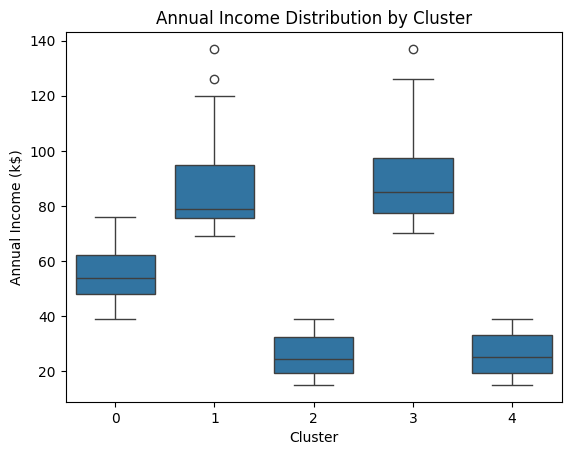

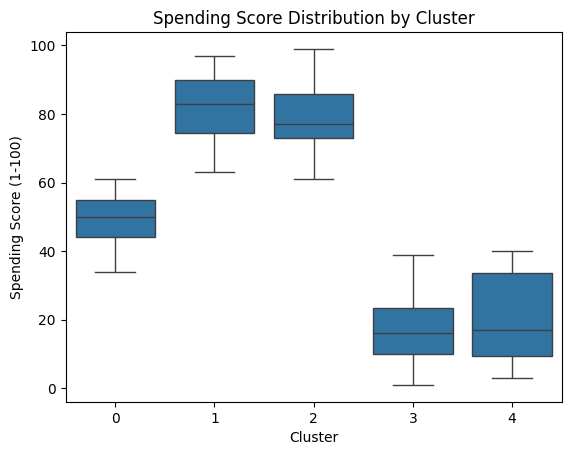

In [88]:
# Annual Income Distribution by Cluster
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Annual Income Distribution by Cluster')
plt.show()

# Spending Score Distribution by Cluster
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Spending Score Distribution by Cluster')
plt.show()
